**First we must import the libraries and data that we'll be using.**

In [1]:
!pip install yfinance 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
try:
    import yfinance as yf    # import  Yahoo! Finance
except:
    !pip install yfinance # install Yahoo! Finance
    import yfinance as yf    # import  Yahoo! Finance

from pandas_datareader import data as pdr
yf.pdr_override()
yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [3]:
# inputs
Stocks = ['AAPL', 'RDFN', 'CDK', 'SONY', 'HPQ', 'MSFT', 'TTWO', 'ARW', 'AMD', 'NVDA']
start = datetime.fromisoformat('2018-11-19')
end = datetime.fromisoformat('2021-12-02')

In [4]:
#individual company data
Sega = DataReader('AAPL', start, end)
SquareEnix = DataReader('RDFN', start, end)
Tencent = DataReader('CDK', start, end)
Sony = DataReader('SONY', start, end)
Nintendo = DataReader('HPQ', start, end)
Microsoft = DataReader('MSFT', start, end)
TakeTwo = DataReader('TTWO', start, end)
EA = DataReader('ARW', start, end)
AMD = DataReader('AMD', start, end)
Nvidia = DataReader('NVDA', start, end)

#10 Selec
df = pd.DataFrame()
data = []
for symbol in Stocks:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
df.columns = data
df = df.dropna(axis='columns')
print("The head of the data")
df.head()

The head of the data


,AAPL,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
Date,,,,,,,,,,
2018-11-19,45.107174,14.67,47.857357,50.990002,21.382565,101.166908,106.000000,73.610001,19.110001,35.911980
2018-11-20,42.952045,14.41,47.664742,49.529999,20.529079,98.352943,104.720001,71.760002,19.209999,36.999020
2018-11-21,42.903507,14.38,47.847736,50.520000,20.574476,99.706741,106.839996,73.209999,18.730000,35.914471
2018-11-23,41.813812,14.73,48.078880,49.689999,20.438284,99.668060,105.500000,73.500000,19.379999,35.986443
2018-11-26,42.379288,15.36,48.415974,51.020000,20.710672,102.955849,110.440002,74.050003,20.080000,37.984310


In [6]:
print("The tail of the data")
df.tail()


The tail of the data


,AAPL,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
Date,,,,,,,,,,
2021-11-19,160.550003,44.169998,40.169998,125.239998,31.450001,343.109985,170.500000,126.220001,155.410004,329.850006
2021-11-22,161.020004,43.029999,40.580002,122.400002,31.930000,339.829987,164.910004,127.900002,152.520004,319.559998
2021-11-23,161.410004,41.410000,40.410000,121.779999,32.189999,337.679993,165.130005,129.600006,149.919998,317.459991
2021-11-24,161.940002,42.919998,40.270000,122.220001,35.439999,337.910004,164.309998,128.669998,157.800003,326.739990
2021-11-26,156.809998,41.799999,39.759998,121.269997,34.580002,329.679993,169.660004,123.970001,154.809998,315.029999


In [7]:
print("More details about the data.")
df.describe()

More details about the data.


,AAPL,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,90.914869,37.295637,47.446411,76.022667,21.652045,189.708005,142.457609,86.256965,61.374179,103.679758
std,38.562851,20.465602,5.689009,23.117608,5.494448,63.737138,32.266637,20.034499,31.476659,65.901228
min,34.508709,10.330000,29.449957,42.029999,12.514390,91.023132,84.629997,41.060001,16.650000,31.570568
25%,51.333580,18.360001,43.529999,55.720001,17.716572,134.296707,116.660004,71.129997,30.990000,44.911400
50%,79.910019,31.230000,47.817207,70.459999,19.395544,182.453064,134.410004,79.639999,54.040001,87.594559
75%,126.724907,51.889999,51.771698,99.050003,26.963404,234.328766,170.610001,104.769997,84.849998,137.798309
max,161.940002,96.589996,60.424301,125.239998,35.439999,343.109985,213.339996,129.600006,157.800003,329.850006


To help us see what we're looking at, let's plot the stock prices of all 10 companies. Notice the changes in Sega are barely noticble.

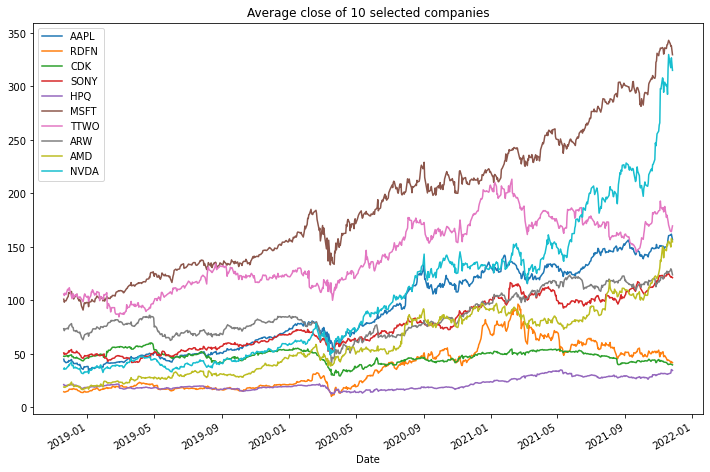

In [8]:
Sega['Adj Close'].plot(label = 'AAPL', figsize = (12,8))
SquareEnix['Adj Close'].plot(label = 'RDFN')
Tencent['Adj Close'].plot(label = 'CDK')
Sony['Adj Close'].plot(label = 'SONY')
Nintendo['Adj Close'].plot(label = 'HPQ')
Microsoft['Adj Close'].plot(label = 'MSFT')
TakeTwo['Adj Close'].plot(label = 'TTWO')
EA['Adj Close'].plot(label = 'ARW')
AMD['Adj Close'].plot(label = 'AMD')
Nvidia['Adj Close'].plot(label = "NVDA")
plt.title('Average close of 10 selected companies')
plt.legend()

**After seeing this, microsoft and nvidia still seem to stick out from the rest over the past few years. Now let's visually examine two things. The risk involved with each stock, and the average return of each stock.**

In [9]:
rets = df.pct_change(periods=3)
corr = rets.corr()
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk v Returns')
tables = pd.DataFrame(data=d)
tables   

Table: Risk v Returns


,Risk,Expected Returns
AAPL,0.033618,0.005721
RDFN,0.080163,0.007409
CDK,0.034910,-0.000075
SONY,0.031509,0.003992
HPQ,0.043736,0.002923
MSFT,0.027404,0.005184
TTWO,0.034853,0.002401
ARW,0.036704,0.002901
AMD,0.054490,0.009770
NVDA,0.048047,0.009802


Text(0, 0.5, 'SD')

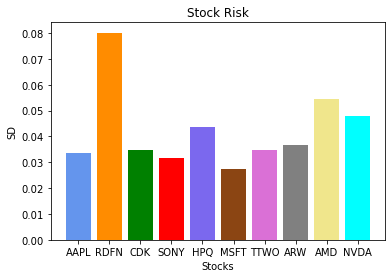

In [10]:
plt.bar(rets.columns, rets.std(), color=['cornflowerblue', 'darkorange', 'green', 'red', 'mediumslateblue', 'saddlebrown', 'orchid', 'grey', 'khaki', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stocks")
plt.ylabel("SD")

Text(0, 0.5, 'Returns')

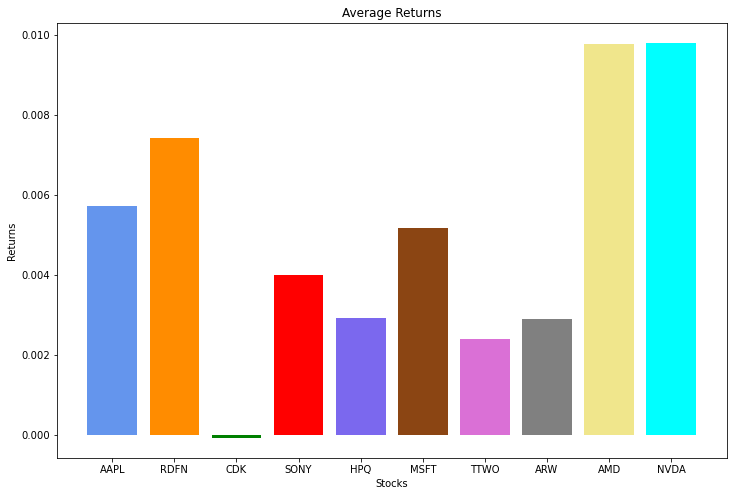

In [11]:
plt.figure(figsize=(12, 8))
plt.bar(rets.columns, rets.mean(), color=['cornflowerblue', 'darkorange', 'green', 'red', 'mediumslateblue', 'saddlebrown', 'orchid', 'grey', 'khaki', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stocks")
plt.ylabel("Returns")

**CDK Global has very little return, AMD and Nvidia still have the highest.**

**Now let's look at these two peices of information together. Plotting in both a bar and a scatter plot will make it easier to see what has the highest and lowest risks and rewards.**

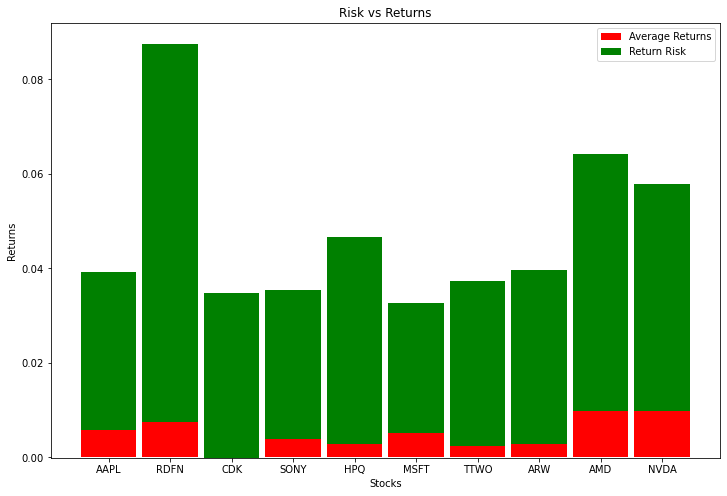

In [12]:
Stocks = ['AAPL', 'RDFN', 'CDK', 'SONY', 'HPQ', 'MSFT', 'TTWO', 'ARW', 'AMD', 'NVDA']
ind = [x for x, _ in enumerate(Stocks)]
plt.figure(figsize=(12, 8))
plt.bar(ind, rets.mean(), width=0.9, label='Average Returns', color='r')
plt.bar(ind, rets.std(), width=0.9, label='Return Risk', color='g', bottom=rets.mean())

plt.xticks(ind, Stocks)
plt.ylabel("Returns")
plt.xlabel("Stocks")
plt.legend(loc="upper right")
plt.title('Risk vs Returns')
plt.show()

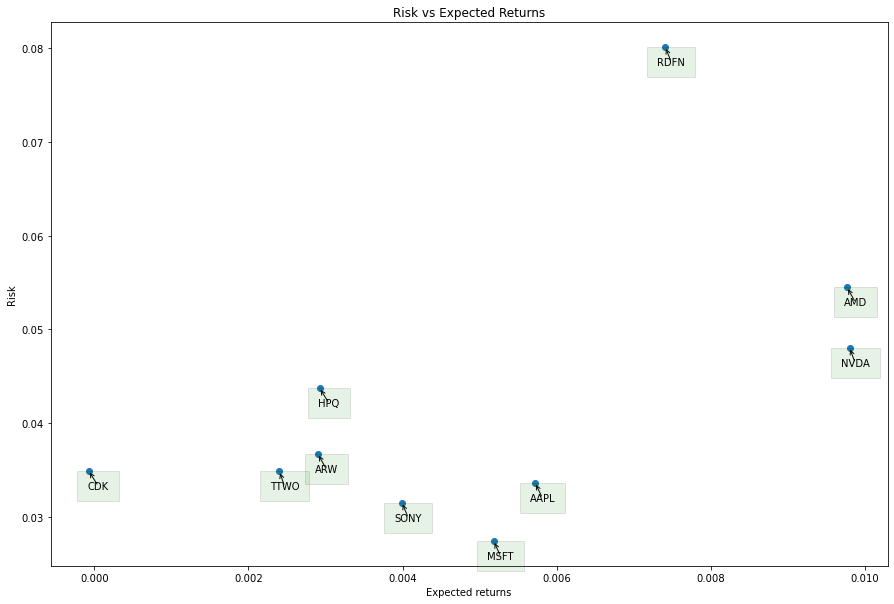

In [13]:
plt.figure(figsize=(15, 10))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'square,pad=1', fc = 'green', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    

**Investment for the week of 11/26**
For this week, I decided to get rid of some of the companies that didn't look as promising and analyze some new ones. After doing this, I found that apple looked to be promising and I decided to give Sony a chance as well. I bought 150 shares of Apple (AAPL) stocks, 200 shares of Sony (SONY) stocks, and 50 more shares of Microsoft (MSFT) stocks.